# Plot output of Richards1D simultion

    -Author: Niccolò Tubini, Concetta D'Amato and Riccardo Rigon
    -License: Creative Commons 4.0

In [1]:
%%capture
%run Richards1DOutput.py

In [2]:
#from netCDF4_classic import Dataset
from netCDF4 import Dataset


import os

## pandas
import pandas as pd

## numpy
import numpy as np

## plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
%matplotlib inline
import matplotlib.transforms as transforms
import matplotlib.ticker as mtick

## to convert unix time to human readable date
import time
import datetime

# Standard imports 
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import gridplot
from bokeh.models.widgets import Panel, Tabs
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import BoxSelectTool
from bokeh.models import HoverTool

output_notebook()


Loading BokehJS ...

# Richards 1D: input


Here you can read the .csv file used to create the grid. 
This file is used to plot layers limits in water content plots.

Set in

                               your_path/data/Richards1D/RichardsMeshGen_input

In [3]:
os.chdir("C:/Users/Utente/Desktop/Tirocinio/OMS/Richards1D/data/RichardMeshGen_input")
os.listdir()

['Casulli2010_test2.csv',
 'Casulli2010_test2VG.csv',
 'ClaySand_noPonding.csv',
 'ClaySand_noPonding.PNG',
 'Clay_noPonding.csv',
 'Clay_noPonding.PNG',
 'Clay_noPonding_BC.csv',
 'Clay_noPonding_Dry.csv',
 'Clay_noPonding_Kosugi.csv',
 'SandClay_01Ponding_Measurement.csv',
 'SandClay_01Ponding_Measurement.PNG',
 'Sand_01Ponding.csv',
 'Sand_01Ponding.PNG',
 'Test1_BC.csv',
 'Test1_VG.csv']

In [4]:
data = pd.read_csv("Test1_BC.csv")

# Richards 1D: outputs

Here you can read the output of your simulation (.nc). 

Set in

                            your_path/output

In [5]:
os.chdir("C:/Users/Utente/Desktop/Tirocinio/OMS/Richards1D/output")
os.listdir()

['Casulli2010_test2VG_noRain_bottomDirichlet_300s.nc',
 'Casulli2010_test2_noRain_bottomDirichlet_100s.nc',
 'Casulli2010_test2_noRain_bottomDirichlet_100s_max.nc',
 'Casulli2010_test2_noRain_bottomDirichlet_300s.nc',
 'ClaySand_noPonding_TrentoRain_BottomDirichlet.nc',
 'Clay_01Ponding_noRain_BottomDirichlet.nc',
 'Clay_noPonding_2mmRain_BottomImpervious.nc',
 'Clay_noPonding_4mmRain_BottomImpervious.nc',
 'Clay_noPonding_Dry_2mmRain_bottomDirichlet0m.nc',
 'Clay_noPonding_noRain_05BottomDirichlet.nc',
 'Clay_noPonding_noRain_2mmBottomNeumann.nc',
 'Clay_noPonding_noRain_BottomDirichlet.nc',
 'Integrate PDE',
 'Output_Test1_BC.nc',
 'Output_Test1_VG.nc',
 'SandClay_noPonding_TrentoRain_BottomDirichlet.nc',
 'Sand_01Ponding_noRain_BottomDirichlet.nc',
 'Sand_01Ponding_noRain_BottomFreeDrainage.nc']

In [6]:
fileName = 'Output_Test1_BC.nc'

# Set some plot features

In [7]:
labelSize = 18
titleSize = 22
legendSize = 14
axisTicksSize = 14

lineWidth = 3
lineStyle =''

markerSize = 3
markerType = 'o'

figureSizeHeigth = 10
figureSizeWidth = 10
figureSizeHeigth1 = 10
figureSizeWidth1 = 20


## Import your NetCDF file and store all data in appropriate variables

In [8]:
[ncfile,depths,dualDepths,time,psi,theta,iC,velocities,error,dates,topBC_DF,bottomBC_DF] = readRichardsOutputNetCDF(fileName)

*** SUCCESS reading

 ***FILE INFO:

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Description_of_the_problem: grid Test1_VG.nc, rain: 2mm/h, Bottom Dirichlet, integration time step 300s, interface hydraulic conductivity: mean 
    dimensions(sizes): depth(351), dualDepth(351), time(8929)
    variables(dimensions): float64 depth(depth), float64 dual_depth(dualDepth), int32 time(time), float64 psi(time,depth), float64 psiIC(depth), float64 water_heigth(time,depth), float64 velocities(time,dualDepth), float64 error(time), float64 topBC(time), float64 bottomBC(time), float64 runOff(time)
    groups: 



## Plot results
The solution is time dependent,thus to show the solution at a certain time you can define the timeIndex variable (i.e. the number of the time step: 0 is the first time step coincedent with the the start date of your simulation, 1 is the second one and so on), or define myDate (i.e. day and time you are interested in) 

In [9]:
## enter the time index you want to plot with animated graph
TimeIndex = 135
date2 = datetime.datetime.fromtimestamp(time[TimeIndex])

In [10]:
## enter the vector of the three time index you want to plot
timeIndex = [1,50,100]
date = []
for n in timeIndex:
    temp = datetime.datetime.fromtimestamp(time[n])
    date = np.append(date, temp.strftime('%Y-%m-%d %H:%M') )

In [11]:
## OR enter the date [yyyy-MM-dd HH:mm] you want to plot
#myDate = ['2017-01-01 01:40', '2017-01-01 06:50', '2017-01-01 10:50']
#timeIndex = []
#for i in range(0,len(myDate)):
    #timeIndex = np.append(timeIndex,dates.index(myDate[i]))
#date = myDate

In [12]:
for d in date:
    print('Considero la soluzione per '+ d) 

Considero la soluzione per 2017-01-01 00:05
Considero la soluzione per 2017-01-01 04:10
Considero la soluzione per 2017-01-01 08:20


### Plot initial condition

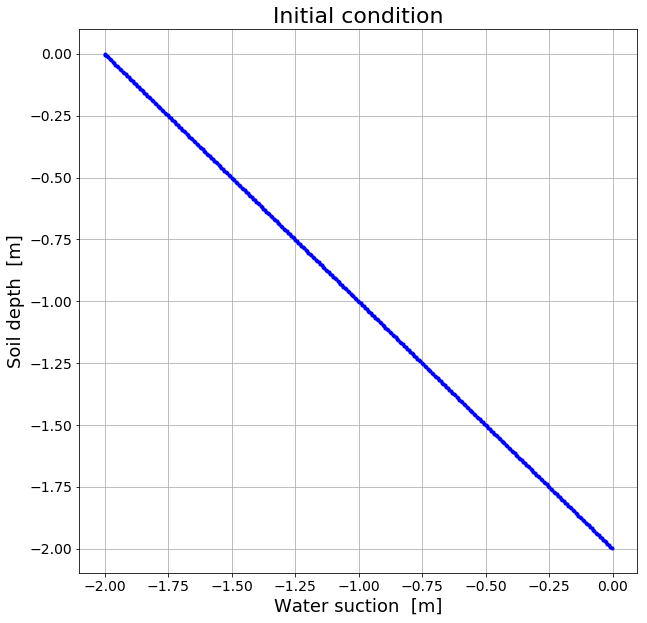

In [13]:
showInitialCondition(iC,depths,ncfile,labelSize,titleSize,legendSize,axisTicksSize,lineWidth,lineStyle,markerSize,markerType,figureSizeHeigth,figureSizeWidth,figureSizeHeigth1,figureSizeWidth1)

### Plot water suction

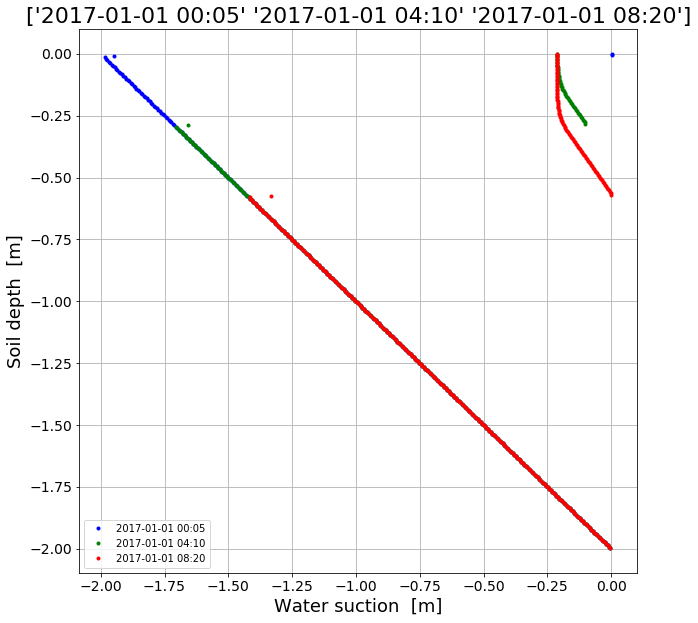

In [14]:
 showWaterSuction(timeIndex,date,psi,depths,time,ncfile,labelSize,titleSize,legendSize,axisTicksSize,lineWidth,lineStyle,markerSize,markerType,figureSizeHeigth,figureSizeWidth,figureSizeHeigth1,figureSizeWidth1)


##### Plot the above graph with boundary condition time-series besides

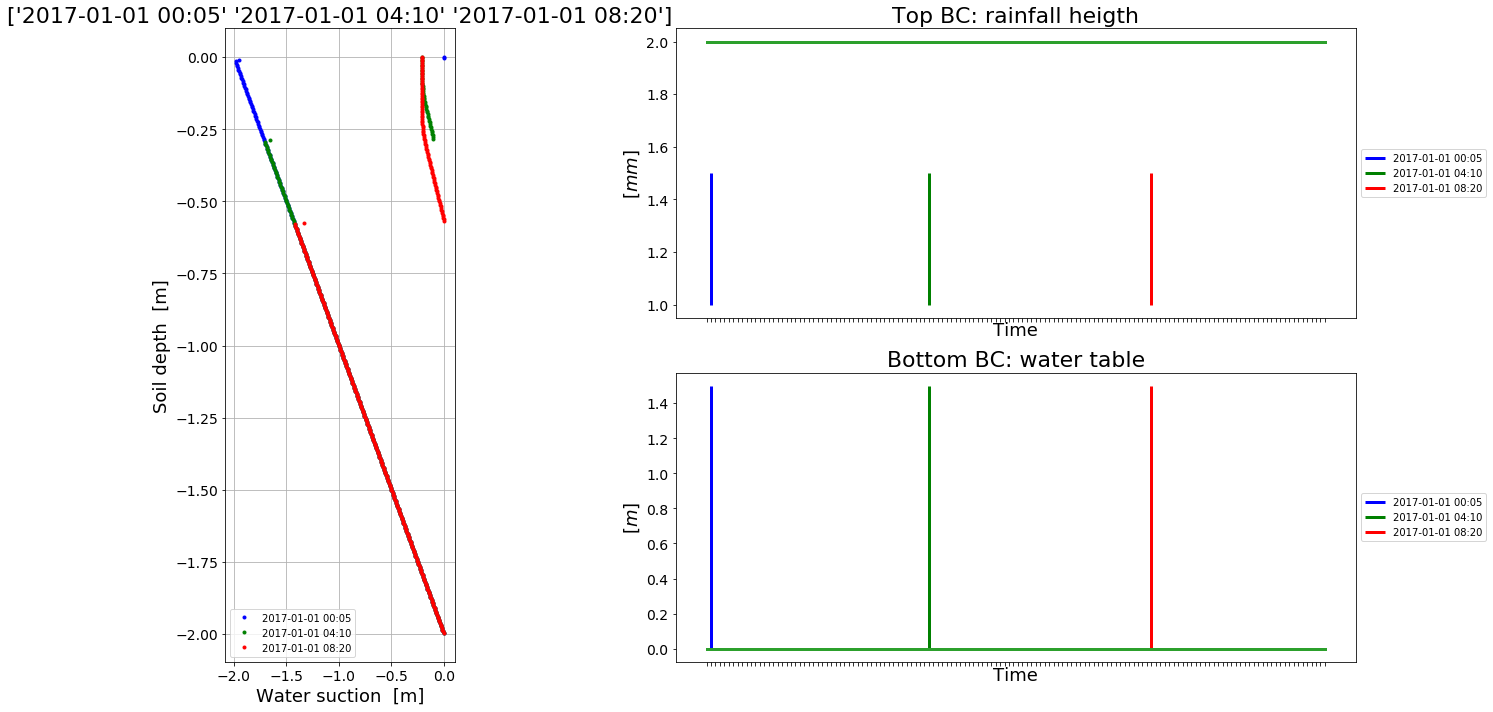

In [15]:
showWaterSuctionWithBCs(timeIndex,date,psi,depths,topBC_DF,bottomBC_DF,time,ncfile,labelSize,titleSize,legendSize,axisTicksSize,lineWidth,lineStyle,markerSize,markerType,figureSizeHeigth,figureSizeWidth,figureSizeHeigth1,figureSizeWidth1)


### Plot hydraulic head
Is the hydraulic head $\psi + z$ that drives the water flow

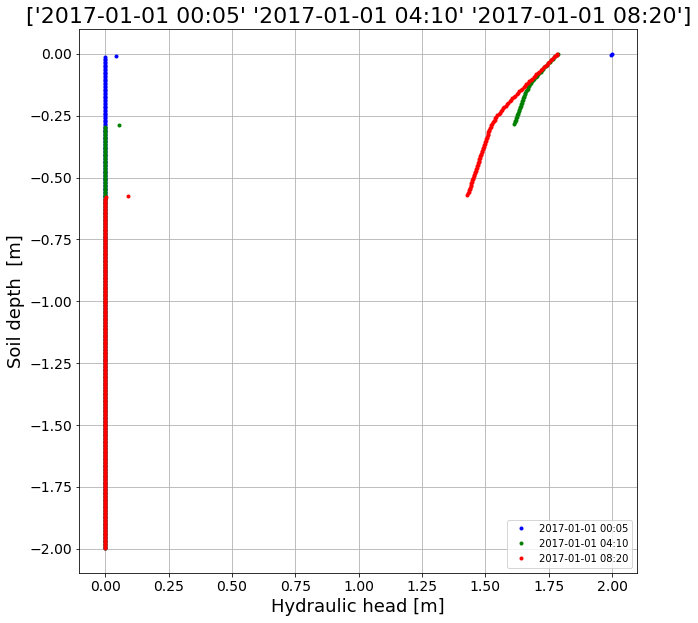

In [16]:
showHydraulicHead(timeIndex,date,psi,depths,time,ncfile,labelSize,titleSize,legendSize,axisTicksSize,lineWidth,lineStyle,markerSize,markerType,figureSizeHeigth,figureSizeWidth,figureSizeHeigth1,figureSizeWidth1)



### Plot water content and water depth

In [17]:
# Le linee orizzontali rappresentano la lama d'acqua che si viene a formare sopra la superficie del terreno; 
# mentre le curve rappresentano il contenuto d'acqua nel suolo adimensionale.

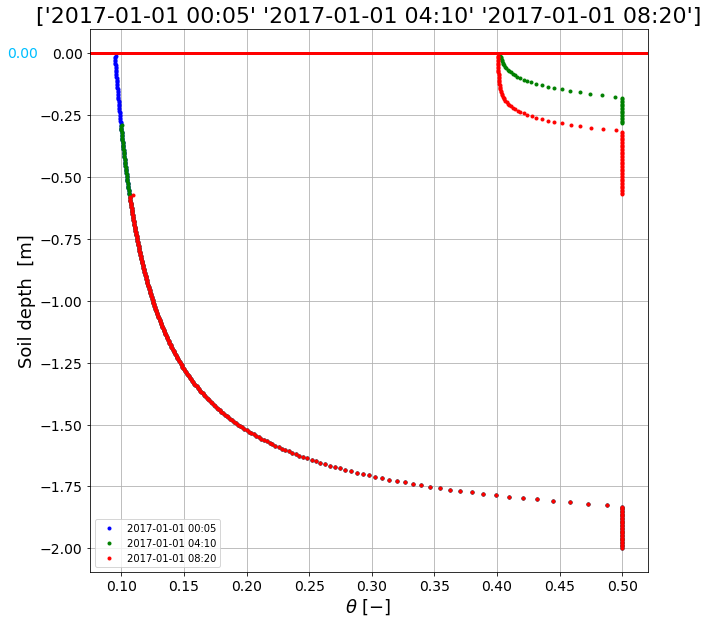

In [18]:
showWaterContent(timeIndex,date,theta,depths,data,time,ncfile,labelSize,titleSize,legendSize,axisTicksSize,lineWidth,lineStyle,markerSize,markerType,figureSizeHeigth,figureSizeWidth,figureSizeHeigth1,figureSizeWidth1)


##### Plot the above graph with boundary condition time-series besides

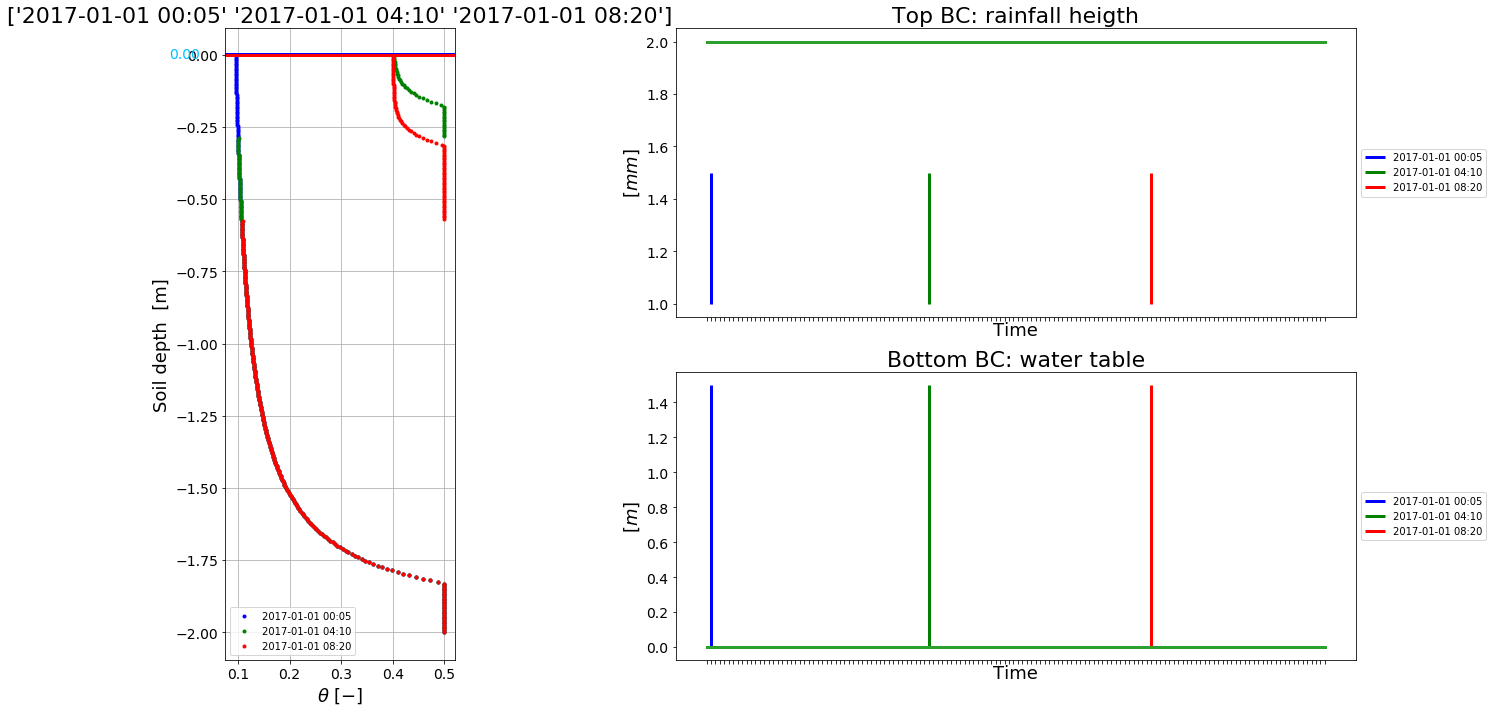

In [19]:
showWaterContentWithBCs(timeIndex,date,theta,depths,bottomBC_DF,topBC_DF,data,time,ncfile,labelSize,titleSize,legendSize,axisTicksSize,lineWidth,lineStyle,markerSize,markerType,figureSizeHeigth,figureSizeWidth,figureSizeHeigth1,figureSizeWidth1)


### Velocities

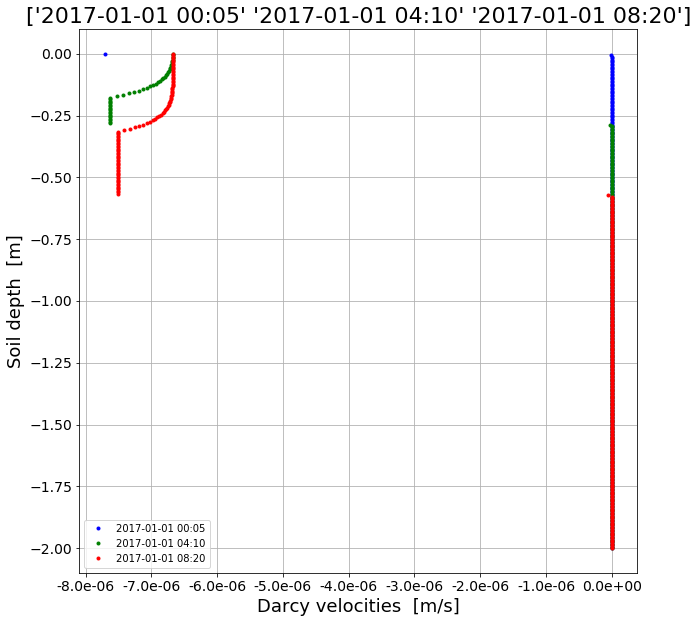

In [20]:
showVelocities(timeIndex,date,velocities,dualDepths,time,ncfile,labelSize,titleSize,legendSize,axisTicksSize,lineWidth,lineStyle,markerSize,markerType,figureSizeHeigth,figureSizeWidth,figureSizeHeigth1,figureSizeWidth1)


### Error

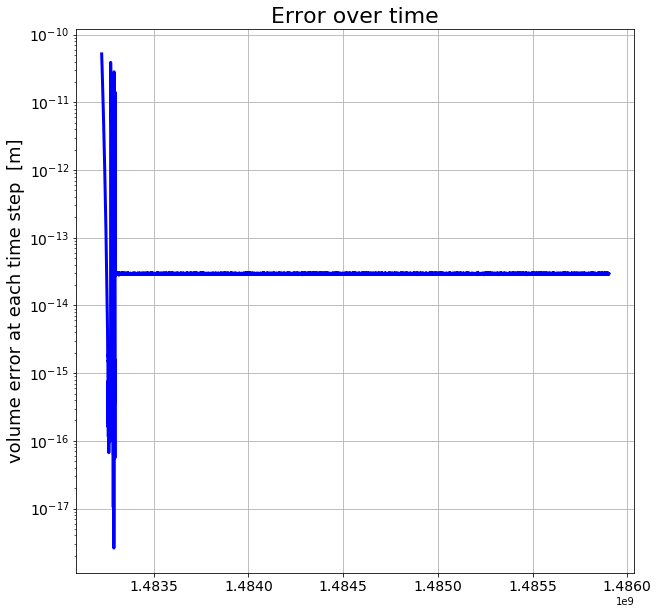

In [21]:
showError(error,time,ncfile,labelSize,titleSize,legendSize,axisTicksSize,lineWidth,lineStyle,markerSize,markerType,figureSizeHeigth,figureSizeWidth,figureSizeHeigth1,figureSizeWidth1)


### Some plots with bokeh package

In [22]:
## https://bokeh.pydata.org/en/latest/docs/user_guide/tools.html#built-in-tools
hover = HoverTool(tooltips=[
    ("(x,y)", "($x, $y)"),
])

p1 = figure(plot_width=600, plot_height=600,tools=['pan,wheel_zoom,box_zoom,reset',hover],
           title="Mouse over the dots")

p1.scatter(psi[TimeIndex,:], depths[:], color="blue")
p1.xaxis.axis_label = ncfile.variables['psi'].long_name + '  [' +ncfile.variables['psi'].units +']'
p1.xaxis.axis_label_text_font_size = str(labelSize) + "px"
p1.yaxis.axis_label = ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']'
p1.yaxis.axis_label_text_font_size = str(labelSize) + "px"
p1.title.text = 'Date: '+date2.strftime('%Y-%m-%d %H:%M')
p1.title.align = "center"
p1.title.text_font_size = str(titleSize) + "px"
tab1 = Panel(child=p1, title="Water suction")

p2 = figure(plot_width=600, plot_height=600,tools=['pan,wheel_zoom,box_zoom,reset',hover],
           title="Mouse over the dots")

p2.scatter(psi[TimeIndex,:]+depths[:]-depths[0], depths[:], color="blue")
p2.xaxis.axis_label = 'Hydraulic head [m]'
p2.xaxis.axis_label_text_font_size = str(labelSize) + "px"
p2.yaxis.axis_label = ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']'
p2.yaxis.axis_label_text_font_size = str(labelSize) + "px"
p2.title.text = 'Date: '+date2.strftime('%Y-%m-%d %H:%M')
p2.title.align = "center"
p2.title.text_font_size = str(titleSize) + "px"
tab2 = Panel(child=p2, title="Hydraulic head")

p3 = figure(plot_width=600, plot_height=600,tools=['pan,wheel_zoom,box_zoom,reset',hover],
           title="Mouse over the dots")
p3.scatter(theta[TimeIndex,0:depths[:].shape[0]-2],depths[0:depths[:].shape[0]-2], color="red",legend='\u03B8 ')
p3.line([np.min(theta[TimeIndex,0:np.size(theta[TimeIndex,])-1])-0.001,np.max(theta[TimeIndex,])+0.001], [theta[TimeIndex,depths[:].shape[0]-1],theta[TimeIndex,depths[:].shape[0]-1]], color="deepskyblue",line_width=lineWidth, legend='Total water level')
for i in range(1,np.size(data.index)-1):
    if data['Type'][i] == 'L':
        c = 'black'
        l = 'layer'
        p3.line([np.min(theta[TimeIndex,0:np.size(theta[TimeIndex,])-1])-0.001,np.max(theta[TimeIndex,])+0.001], [data['eta'][i],data['eta'][i]], color=c,line_width=lineWidth-2,legend='Layer')

p3.legend.location = "bottom_left"
p3.legend.label_text_font_size = str(legendSize) + "px"
p3.legend.click_policy="hide"
p3.xaxis.axis_label = '\u03B8 [-]'
p3.xaxis.axis_label_text_font_size = str(labelSize) + "px"
p3.yaxis.axis_label = ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']'
p3.yaxis.axis_label_text_font_size = str(labelSize) + "px"
p3.title.text = 'Date: '+date2.strftime('%Y-%m-%d %H:%M')
p3.title.align = "center"
p3.title.text_font_size = str(titleSize) + "px"
tab3 = Panel(child=p3, title="Water content and water depth")

p4 = figure(plot_width=600, plot_height=600,tools=['pan,wheel_zoom,box_zoom,reset',hover],
           title="Mouse over the dots")

p4.scatter(velocities[TimeIndex], dualDepths[:], color="black")
p4.xaxis.axis_label = ncfile.variables['velocities'].long_name + '  [' +ncfile.variables['velocities'].units +']'
p4.xaxis.axis_label_text_font_size = str(labelSize) + "px"
p4.yaxis.axis_label = ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']'
p4.yaxis.axis_label_text_font_size = str(labelSize) + "px"
p4.title.text = 'ciao'
p4.title.text = 'Date: '+date2.strftime('%Y-%m-%d %H:%M')
p4.title.align = "center"
p4.title.text_font_size = str(titleSize) + "px"
tab4 = Panel(child=p4, title="Darcy velocities")

tabs = Tabs(tabs=[ tab1, tab2, tab3, tab4 ])
show(tabs)

In [23]:
#ncfile.close()